<a href="https://colab.research.google.com/github/matiasenriqueva/MachineLearning/blob/main/Tarea_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

Hacemos importe de las librerías que utilizaremos a lo largo de la solución

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Cargamos el dataset desde la librería

In [102]:
mpg = sns.load_dataset("mpg")

Guiándonos por el enlace del gráfico de dispersión, mostramos los datos del dataset mpg como un gráfico de dispersiones basandonos en los caballos de fuerza y .

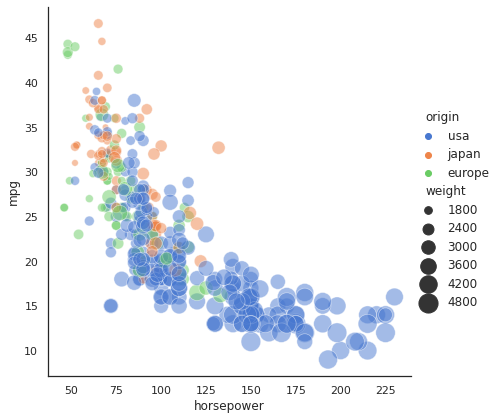

In [103]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

Calculamos la matriz de correlación

In [104]:
corr = mpg.corr()

Creamos el gráfico de correlación en base a la matriz y un mapa de calor.

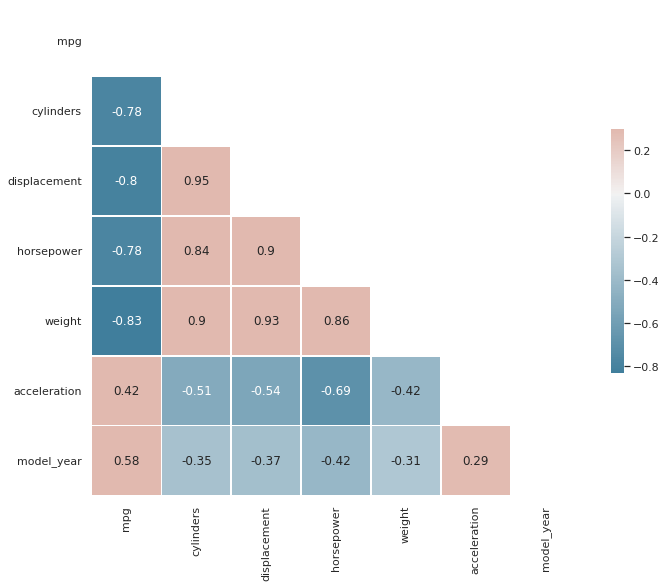

In [105]:
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

3) (1 punto) Construir y entrenar un modelo de regresion lineal


Revisemos un poco los elementos que conforman el dataset

In [106]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Hacemos drop de los NaN de la tabla

In [107]:
mpg.dropna(axis=0, how='any', inplace=True)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Transformamos los label de origin y name, que no son valores númericos a números

In [108]:
label_enconder = LabelEncoder()
mpg["origin"] = label_enconder.fit_transform(mpg["origin"])
mpg["name"] = label_enconder.fit_transform(mpg["name"])

mpg[["origin", "name"]][:]

,origin,name
0,2,48
1,2,35
2,2,229
3,2,13
4,2,159
...,...,...
393,2,151
394,0,297
395,2,118
396,2,157


Separamos x e y

In [109]:
x_values = mpg.iloc[:, 1:]
y_values = mpg.iloc[:, 0]

In [110]:
x_values

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,2,48
1,8,350.0,165.0,3693,11.5,70,2,35
2,8,318.0,150.0,3436,11.0,70,2,229
3,8,304.0,150.0,3433,12.0,70,2,13
4,8,302.0,140.0,3449,10.5,70,2,159
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,2,151
394,4,97.0,52.0,2130,24.6,82,0,297
395,4,135.0,84.0,2295,11.6,82,2,118
396,4,120.0,79.0,2625,18.6,82,2,157


In [111]:
y_values

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

Separamos los valores de entrenamiento y los valores que utilizaremos para las pruebas

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state= 7)

In [113]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

guardamos las predicciones usando los valores de prueba que dejamos apartados

In [114]:
predict = linear_model.predict(x_test)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

Mostramos el error cuadratico $R^2$

In [115]:
linear_model.score(x_test, y_test)

0.8118625083539357

Mostramos el error promedio cuadrado

In [116]:
mean_squared_error(y_test, predict)

11.38989035976165

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


Las variable cylinders y displacement tienen un a correlacion de 0.95, por lo que son nuestras candidatas al gráfico

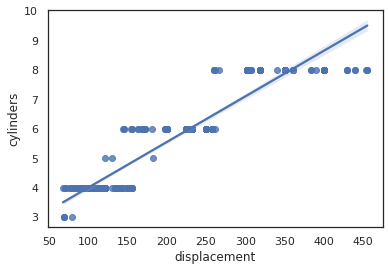

In [117]:
sns.regplot(x="displacement", y="cylinders", data=mpg)

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.